- From the below code we compare the loss functions for both Mean Squared Error & Mean Squared Logarithmic Error.
- We can check the Loss Function in Mean Squared Error. Here, ▶ (https://github.com/saikrishnabudi/Mean-Squared-Error)

In [23]:
# Importing Libraries
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

Train:0.061,Test:0.090


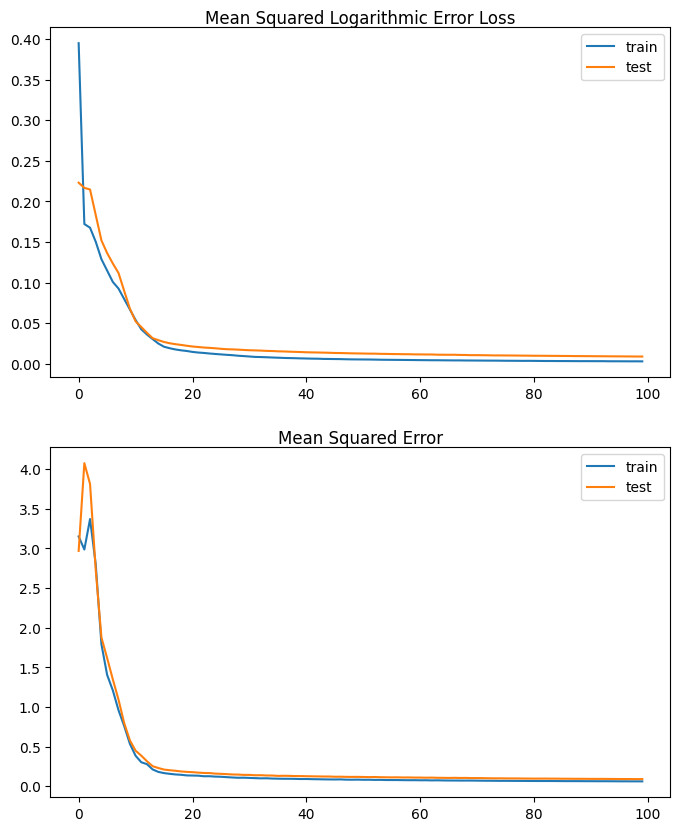

In [24]:
# Generating the Regression Dataset
X,y=make_regression(n_samples=1000,n_features=20,noise=0.1,random_state=1)

# Standardizing the Dataset
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# Observations
n_train=500

# Splitting the data into Training & Testing
trainX,testX=X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

# Define the model
model=Sequential()
model.add(Dense(25,input_dim=20,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(1,activation="linear"))

# Compiling the Model
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss="mean_squared_logarithmic_error",optimizer=opt,metrics=["mse"])

# Fitting the model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)


# Evaluate the model
_,train_mse=model.evaluate(trainX,trainy,verbose=0)
_,test_mse=model.evaluate(testX,testy,verbose=0)

# Displaying the results
print("Train:%.3f,Test:%.3f" %(train_mse,test_mse))

# Plotting the loss During Training
pyplot.figure(figsize=(8,10))
pyplot.subplot(211)
pyplot.title("Mean Squared Logarithmic Error Loss", pad=-20)
pyplot.plot(history.history["loss"], label="train")
pyplot.plot(history.history["val_loss"], label="test")
pyplot.legend()

# Plotting MSE during Training
pyplot.subplot(212)
pyplot.title("Mean Squared Error", pad=-20)
pyplot.plot(history.history["mse"], label="train")
pyplot.plot(history.history["val_mse"], label="test")
pyplot.legend()
pyplot.show()


- From the above results we can able to see that the loss is incresing when comapred to the Mean Absolute Error , Means Squared Error.

- So, this comparision is may not be the good choice for the further process.

- To check the MAE loss function results ▶ (https://github.com/saikrishnabudi/Mean-Squared-Error).

- To check the MSE loss function results ▶ (https://github.com/saikrishnabudi/Mean-Squared-Error).

- So, finally we are able to find the best hyperparameter for the model is Mean Squared Error, Which gives the low results for Loss Function, for Train: 0.003, Test: 0.006 ▶ (https://github.com/saikrishnabudi/Mean-Squared-Error).